In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.reset_default_graph()

color_channels = 1  # data is in black and white, 1 channel
image_height = 28
image_width = 28

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # sets up the data from mnist

# print(x_train.shape)  # contains 60,000 imgs that are 28x28
# print(y_train.shape)  # 60,000 values

In [5]:
# TODO: Setting up Neural Network
class CNN:
    def __init__(self, image_height, image_width, channels, num_classes):
        self.input_layer = tf.placeholder(dtype=tf.float32, shape=[None, image_height, image_width, channels])
        
        conv_layer_1 = tf.layers.conv2d(self.input_layer, filters=32, kernel_size=[2, 2], padding="same", activation=tf.nn.relu)  # convolutional layer
        """The first input is the layer before the current one, the last input
            is the activation function. This act fn helps neural net solve for what
            the object could potentially be."""
        pooling_layer_1 = tf.layers.max_pooling2d(conv_layer_1, pool_size=[2, 2], strides=2)  # pooling layer
        
        conv_layer_2 = tf.layers.conv2d(pooling_layer_1, filters=32, kernel_size=[2, 2], padding="same", activation=tf.nn.relu)  # convolutional layer
        pooling_layer_2 = tf.layers.max_pooling2d(conv_layer_2, pool_size=[2, 2], strides=2)  # pooling layer
        
        # create the flatten layer...
        flattened_pooling = tf.layers.flatten(pooling_layer_2)  # pooling layer
        dense_layer = tf.layers.dense(flattened_pooling, 1024, activation=tf.nn.relu)  # dense layer: takes last layer, number of neurons to activate activation layer, and activation fn
        
        dropout = tf.layers.dropout(dense_layer, rate=0.4, training=True)  # dropout layer
        outputs = tf.layers.dense(dropout, num_classes)  # output layer
        
        
        # Getting data from the network
        self.choice = tf.argmax(outputs, axis=1)  # (1) CHOICE VARIABLE 
            # axis is dependent on which var to check for maximum, output is 1d, theres 1 axis
        self.probability = tf.nn.softmax(outputs)  # (2) SCALE PROBABILITIES
        self.labels = tf.placeholder(dtype=tf.float32, name="labels")  # (3) CREATE LABELS CONTAINER
        self.accuracy, self.accuracy_op = tf.metrics.accuracy(self.labels, self.choice)  # (4) GATHERING ACCURACY
        one_hot_labels = tf.one_hot(indices=tf.cast(self.labels, dtype=tf.int32), depth=num_classes)  # (5) ONE-HOT ENCODING, depth determined on num of possibilities (10)
        self.loss = tf.losses.softmax_cross_entropy(onehot_labels=one_hot_labels, logits=outputs)  # (6) LOSS FN
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-3)  # (7) OPTIMIZER, helps reduce loss with LEARNING RATE var (0>x>1)
        self.train_operation = optimizer.minimize(loss=self.loss, global_step=tf.train.get_global_step())  # (8) TRAINING STEP
        
        
        

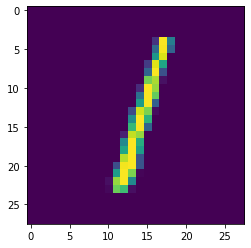

W0706 19:31:29.566580 4474418624 deprecation.py:323] From <ipython-input-5-2120cb5d6545>:6: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0706 19:31:29.571243 4474418624 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0706 19:31:29.750252 4474418624 deprecation.py:323] From <ipython-input-5-2120cb5d6545>:10: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
W0706 19:31:29.868784 4474418624 dep

In [6]:
steps = 5000
batch_size = 32
num_classes = 10

test_img = x_test[2]
plt.imshow(test_img)
plt.show()
test_img = test_img.reshape(-1, image_height, image_width, 1)

x_train = x_train.reshape(-1, image_height, image_width, 1)

cnn = CNN(image_height, image_width, color_channels, num_classes)

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    
    step = 0
    while step < steps:
        print(sess.run((cnn.train_operation, cnn.accuracy_op),
                       feed_dict={cnn.input_layer:x_train[step: step + batch_size],
                                cnn.labels:y_train[step: step + batch_size]}))
        step += batch_size
    
    print(sess.run(cnn.choice, feed_dict={cnn.input_layer:test_img}))
    

(None, 0.15625)
(None, 0.09375)
(None, 0.17708333)
(None, 0.1640625)
(None, 0.18125)
(None, 0.19791667)
(None, 0.20982143)
(None, 0.22265625)
(None, 0.22569445)
(None, 0.25)
(None, 0.26136363)
(None, 0.28385416)
(None, 0.29807693)
(None, 0.3125)
(None, 0.32083333)
(None, 0.31640625)
(None, 0.3180147)
(None, 0.3246528)
(None, 0.3256579)
(None, 0.3234375)
(None, 0.32440478)
(None, 0.3309659)
(None, 0.33831522)
(None, 0.3372396)
(None, 0.34125)
(None, 0.35216346)
(None, 0.35416666)
(None, 0.3627232)
(None, 0.36422414)
(None, 0.36666667)
(None, 0.37298387)
(None, 0.37304688)
(None, 0.37405303)
(None, 0.37775734)
(None, 0.38035715)
(None, 0.3793403)
(None, 0.38175675)
(None, 0.38651314)
(None, 0.3878205)
(None, 0.38828126)
(None, 0.3910061)
(None, 0.39285713)
(None, 0.3946221)
(None, 0.39772728)
(None, 0.4)
(None, 0.40625)
(None, 0.41156915)
(None, 0.41731772)
(None, 0.42091838)
(None, 0.42375)
(None, 0.4283088)
(None, 0.43389422)
(None, 0.4369104)
(None, 0.44502315)
(None, 0.44829544)
(Non